In [1]:
!kaggle datasets download -d sshikamaru/fruit-recognition

Dataset URL: https://www.kaggle.com/datasets/sshikamaru/fruit-recognition
License(s): other
100%|███████████████████████████████████████▉| 102M/102M [00:15<00:00, 6.40MB/s]
100%|████████████████████████████████████████| 102M/102M [00:15<00:00, 6.82MB/s]


In [3]:
!unzip fruit-recognition.zip -d fruit-recognition

Archive:  fruit-recognition.zip
  inflating: fruit-recognition/sampleSubmission.csv  
  inflating: fruit-recognition/test/test/0000.jpg  
  inflating: fruit-recognition/test/test/0001.jpg  
  inflating: fruit-recognition/test/test/0002.jpg  
  inflating: fruit-recognition/test/test/0003.jpg  
  inflating: fruit-recognition/test/test/0004.jpg  
  inflating: fruit-recognition/test/test/0005.jpg  
  inflating: fruit-recognition/test/test/0006.jpg  
  inflating: fruit-recognition/test/test/0007.jpg  
  inflating: fruit-recognition/test/test/0008.jpg  
  inflating: fruit-recognition/test/test/0009.jpg  
  inflating: fruit-recognition/test/test/0010.jpg  
  inflating: fruit-recognition/test/test/0011.jpg  
  inflating: fruit-recognition/test/test/0012.jpg  
  inflating: fruit-recognition/test/test/0013.jpg  
  inflating: fruit-recognition/test/test/0014.jpg  
  inflating: fruit-recognition/test/test/0015.jpg  
  inflating: fruit-recognition/test/test/0016.jpg  
  inflating: fruit-recognition

  inflating: fruit-recognition/test/test/0465.jpg  
  inflating: fruit-recognition/test/test/0466.jpg  
  inflating: fruit-recognition/test/test/0467.jpg  
  inflating: fruit-recognition/test/test/0468.jpg  
  inflating: fruit-recognition/test/test/0469.jpg  
  inflating: fruit-recognition/test/test/0470.jpg  
  inflating: fruit-recognition/test/test/0471.jpg  
  inflating: fruit-recognition/test/test/0472.jpg  
  inflating: fruit-recognition/test/test/0473.jpg  
  inflating: fruit-recognition/test/test/0474.jpg  
  inflating: fruit-recognition/test/test/0475.jpg  
  inflating: fruit-recognition/test/test/0476.jpg  
  inflating: fruit-recognition/test/test/0477.jpg  
  inflating: fruit-recognition/test/test/0478.jpg  
  inflating: fruit-recognition/test/test/0479.jpg  
  inflating: fruit-recognition/test/test/0480.jpg  
  inflating: fruit-recognition/test/test/0481.jpg  
  inflating: fruit-recognition/test/test/0482.jpg  
  inflating: fruit-recognition/test/test/0483.jpg  
  inflating:

  inflating: fruit-recognition/test/test/1109.jpg  
  inflating: fruit-recognition/test/test/1110.jpg  
  inflating: fruit-recognition/test/test/1111.jpg  
  inflating: fruit-recognition/test/test/1112.jpg  
  inflating: fruit-recognition/test/test/1113.jpg  
  inflating: fruit-recognition/test/test/1114.jpg  
  inflating: fruit-recognition/test/test/1115.jpg  
  inflating: fruit-recognition/test/test/1116.jpg  
  inflating: fruit-recognition/test/test/1117.jpg  
  inflating: fruit-recognition/test/test/1118.jpg  
  inflating: fruit-recognition/test/test/1119.jpg  
  inflating: fruit-recognition/test/test/1120.jpg  
  inflating: fruit-recognition/test/test/1121.jpg  
  inflating: fruit-recognition/test/test/1122.jpg  
  inflating: fruit-recognition/test/test/1123.jpg  
  inflating: fruit-recognition/test/test/1124.jpg  
  inflating: fruit-recognition/test/test/1125.jpg  
  inflating: fruit-recognition/test/test/1126.jpg  
  inflating: fruit-recognition/test/test/1127.jpg  
  inflating:

  inflating: fruit-recognition/test/test/1786.jpg  
  inflating: fruit-recognition/test/test/1787.jpg  
  inflating: fruit-recognition/test/test/1788.jpg  
  inflating: fruit-recognition/test/test/1789.jpg  
  inflating: fruit-recognition/test/test/1790.jpg  
  inflating: fruit-recognition/test/test/1791.jpg  
  inflating: fruit-recognition/test/test/1792.jpg  
  inflating: fruit-recognition/test/test/1793.jpg  
  inflating: fruit-recognition/test/test/1794.jpg  
  inflating: fruit-recognition/test/test/1795.jpg  
  inflating: fruit-recognition/test/test/1796.jpg  
  inflating: fruit-recognition/test/test/1797.jpg  
  inflating: fruit-recognition/test/test/1798.jpg  
  inflating: fruit-recognition/test/test/1799.jpg  
  inflating: fruit-recognition/test/test/1800.jpg  
  inflating: fruit-recognition/test/test/1801.jpg  
  inflating: fruit-recognition/test/test/1802.jpg  
  inflating: fruit-recognition/test/test/1803.jpg  
  inflating: fruit-recognition/test/test/1804.jpg  
  inflating:

  inflating: fruit-recognition/test/test/2303.jpg  
  inflating: fruit-recognition/test/test/2304.jpg  
  inflating: fruit-recognition/test/test/2305.jpg  
  inflating: fruit-recognition/test/test/2306.jpg  
  inflating: fruit-recognition/test/test/2307.jpg  
  inflating: fruit-recognition/test/test/2308.jpg  
  inflating: fruit-recognition/test/test/2309.jpg  
  inflating: fruit-recognition/test/test/2310.jpg  
  inflating: fruit-recognition/test/test/2311.jpg  
  inflating: fruit-recognition/test/test/2312.jpg  
  inflating: fruit-recognition/test/test/2313.jpg  
  inflating: fruit-recognition/test/test/2314.jpg  
  inflating: fruit-recognition/test/test/2315.jpg  
  inflating: fruit-recognition/test/test/2316.jpg  
  inflating: fruit-recognition/test/test/2317.jpg  
  inflating: fruit-recognition/test/test/2318.jpg  
  inflating: fruit-recognition/test/test/2319.jpg  
  inflating: fruit-recognition/test/test/2320.jpg  
  inflating: fruit-recognition/test/test/2321.jpg  
  inflating:

  inflating: fruit-recognition/test/test/2758.jpg  
  inflating: fruit-recognition/test/test/2759.jpg  
  inflating: fruit-recognition/test/test/2760.jpg  
  inflating: fruit-recognition/test/test/2761.jpg  
  inflating: fruit-recognition/test/test/2762.jpg  
  inflating: fruit-recognition/test/test/2763.jpg  
  inflating: fruit-recognition/test/test/2764.jpg  
  inflating: fruit-recognition/test/test/2765.jpg  
  inflating: fruit-recognition/test/test/2766.jpg  
  inflating: fruit-recognition/test/test/2767.jpg  
  inflating: fruit-recognition/test/test/2768.jpg  
  inflating: fruit-recognition/test/test/2769.jpg  
  inflating: fruit-recognition/test/test/2770.jpg  
  inflating: fruit-recognition/test/test/2771.jpg  
  inflating: fruit-recognition/test/test/2772.jpg  
  inflating: fruit-recognition/test/test/2773.jpg  
  inflating: fruit-recognition/test/test/2774.jpg  
  inflating: fruit-recognition/test/test/2775.jpg  
  inflating: fruit-recognition/test/test/2776.jpg  
  inflating:

  inflating: fruit-recognition/test/test/3256.jpg  
  inflating: fruit-recognition/test/test/3257.jpg  
  inflating: fruit-recognition/test/test/3258.jpg  
  inflating: fruit-recognition/test/test/3259.jpg  
  inflating: fruit-recognition/test/test/3260.jpg  
  inflating: fruit-recognition/test/test/3261.jpg  
  inflating: fruit-recognition/test/test/3262.jpg  
  inflating: fruit-recognition/test/test/3263.jpg  
  inflating: fruit-recognition/test/test/3264.jpg  
  inflating: fruit-recognition/test/test/3265.jpg  
  inflating: fruit-recognition/test/test/3266.jpg  
  inflating: fruit-recognition/test/test/3267.jpg  
  inflating: fruit-recognition/test/test/3268.jpg  
  inflating: fruit-recognition/test/test/3269.jpg  
  inflating: fruit-recognition/test/test/3270.jpg  
  inflating: fruit-recognition/test/test/3271.jpg  
  inflating: fruit-recognition/test/test/3272.jpg  
  inflating: fruit-recognition/test/test/3273.jpg  
  inflating: fruit-recognition/test/test/3274.jpg  
  inflating:

  inflating: fruit-recognition/test/test/3757.jpg  
  inflating: fruit-recognition/test/test/3758.jpg  
  inflating: fruit-recognition/test/test/3759.jpg  
  inflating: fruit-recognition/test/test/3760.jpg  
  inflating: fruit-recognition/test/test/3761.jpg  
  inflating: fruit-recognition/test/test/3762.jpg  
  inflating: fruit-recognition/test/test/3763.jpg  
  inflating: fruit-recognition/test/test/3764.jpg  
  inflating: fruit-recognition/test/test/3765.jpg  
  inflating: fruit-recognition/test/test/3766.jpg  
  inflating: fruit-recognition/test/test/3767.jpg  
  inflating: fruit-recognition/test/test/3768.jpg  
  inflating: fruit-recognition/test/test/3769.jpg  
  inflating: fruit-recognition/test/test/3770.jpg  
  inflating: fruit-recognition/test/test/3771.jpg  
  inflating: fruit-recognition/test/test/3772.jpg  
  inflating: fruit-recognition/test/test/3773.jpg  
  inflating: fruit-recognition/test/test/3774.jpg  
  inflating: fruit-recognition/test/test/3775.jpg  
  inflating:

  inflating: fruit-recognition/test/test/4249.jpg  
  inflating: fruit-recognition/test/test/4250.jpg  
  inflating: fruit-recognition/test/test/4251.jpg  
  inflating: fruit-recognition/test/test/4252.jpg  
  inflating: fruit-recognition/test/test/4253.jpg  
  inflating: fruit-recognition/test/test/4254.jpg  
  inflating: fruit-recognition/test/test/4255.jpg  
  inflating: fruit-recognition/test/test/4256.jpg  
  inflating: fruit-recognition/test/test/4257.jpg  
  inflating: fruit-recognition/test/test/4258.jpg  
  inflating: fruit-recognition/test/test/4259.jpg  
  inflating: fruit-recognition/test/test/4260.jpg  
  inflating: fruit-recognition/test/test/4261.jpg  
  inflating: fruit-recognition/test/test/4262.jpg  
  inflating: fruit-recognition/test/test/4263.jpg  
  inflating: fruit-recognition/test/test/4264.jpg  
  inflating: fruit-recognition/test/test/4265.jpg  
  inflating: fruit-recognition/test/test/4266.jpg  
  inflating: fruit-recognition/test/test/4267.jpg  
  inflating:

  inflating: fruit-recognition/test/test/4683.jpg  
  inflating: fruit-recognition/test/test/4684.jpg  
  inflating: fruit-recognition/test/test/4685.jpg  
  inflating: fruit-recognition/test/test/4686.jpg  
  inflating: fruit-recognition/test/test/4687.jpg  
  inflating: fruit-recognition/test/test/4688.jpg  
  inflating: fruit-recognition/test/test/4689.jpg  
  inflating: fruit-recognition/test/test/4690.jpg  
  inflating: fruit-recognition/test/test/4691.jpg  
  inflating: fruit-recognition/test/test/4692.jpg  
  inflating: fruit-recognition/test/test/4693.jpg  
  inflating: fruit-recognition/test/test/4694.jpg  
  inflating: fruit-recognition/test/test/4695.jpg  
  inflating: fruit-recognition/test/test/4696.jpg  
  inflating: fruit-recognition/test/test/4697.jpg  
  inflating: fruit-recognition/test/test/4698.jpg  
  inflating: fruit-recognition/test/test/4699.jpg  
  inflating: fruit-recognition/test/test/4700.jpg  
  inflating: fruit-recognition/test/test/4701.jpg  
  inflating:

  inflating: fruit-recognition/test/test/5092.jpg  
  inflating: fruit-recognition/test/test/5093.jpg  
  inflating: fruit-recognition/test/test/5094.jpg  
  inflating: fruit-recognition/test/test/5095.jpg  
  inflating: fruit-recognition/test/test/5096.jpg  
  inflating: fruit-recognition/test/test/5097.jpg  
  inflating: fruit-recognition/test/test/5098.jpg  
  inflating: fruit-recognition/test/test/5099.jpg  
  inflating: fruit-recognition/test/test/5100.jpg  
  inflating: fruit-recognition/test/test/5101.jpg  
  inflating: fruit-recognition/test/test/5102.jpg  
  inflating: fruit-recognition/test/test/5103.jpg  
  inflating: fruit-recognition/test/test/5104.jpg  
  inflating: fruit-recognition/test/test/5105.jpg  
  inflating: fruit-recognition/test/test/5106.jpg  
  inflating: fruit-recognition/test/test/5107.jpg  
  inflating: fruit-recognition/test/test/5108.jpg  
  inflating: fruit-recognition/test/test/5109.jpg  
  inflating: fruit-recognition/test/test/5110.jpg  
  inflating:

  inflating: fruit-recognition/test/test/5515.jpg  
  inflating: fruit-recognition/test/test/5516.jpg  
  inflating: fruit-recognition/test/test/5517.jpg  
  inflating: fruit-recognition/test/test/5518.jpg  
  inflating: fruit-recognition/test/test/5519.jpg  
  inflating: fruit-recognition/test/test/5520.jpg  
  inflating: fruit-recognition/test/test/5521.jpg  
  inflating: fruit-recognition/test/test/5522.jpg  
  inflating: fruit-recognition/test/test/5523.jpg  
  inflating: fruit-recognition/test/test/5524.jpg  
  inflating: fruit-recognition/test/test/5525.jpg  
  inflating: fruit-recognition/test/test/5526.jpg  
  inflating: fruit-recognition/test/test/5527.jpg  
  inflating: fruit-recognition/test/test/5528.jpg  
  inflating: fruit-recognition/test/test/5529.jpg  
  inflating: fruit-recognition/test/test/5530.jpg  
  inflating: fruit-recognition/test/test/5531.jpg  
  inflating: fruit-recognition/test/test/5532.jpg  
  inflating: fruit-recognition/test/test/5533.jpg  
  inflating:

  inflating: fruit-recognition/train/train/Apple Braeburn/Apple Braeburn_359.jpg  
  inflating: fruit-recognition/train/train/Apple Braeburn/Apple Braeburn_36.jpg  
  inflating: fruit-recognition/train/train/Apple Braeburn/Apple Braeburn_360.jpg  
  inflating: fruit-recognition/train/train/Apple Braeburn/Apple Braeburn_361.jpg  
  inflating: fruit-recognition/train/train/Apple Braeburn/Apple Braeburn_362.jpg  
  inflating: fruit-recognition/train/train/Apple Braeburn/Apple Braeburn_363.jpg  
  inflating: fruit-recognition/train/train/Apple Braeburn/Apple Braeburn_364.jpg  
  inflating: fruit-recognition/train/train/Apple Braeburn/Apple Braeburn_365.jpg  
  inflating: fruit-recognition/train/train/Apple Braeburn/Apple Braeburn_366.jpg  
  inflating: fruit-recognition/train/train/Apple Braeburn/Apple Braeburn_367.jpg  
  inflating: fruit-recognition/train/train/Apple Braeburn/Apple Braeburn_368.jpg  
  inflating: fruit-recognition/train/train/Apple Braeburn/Apple Braeburn_369.jpg  
  inf

  inflating: fruit-recognition/train/train/Apple Granny Smith/Apple Granny Smith_405.jpg  
  inflating: fruit-recognition/train/train/Apple Granny Smith/Apple Granny Smith_406.jpg  
  inflating: fruit-recognition/train/train/Apple Granny Smith/Apple Granny Smith_407.jpg  
  inflating: fruit-recognition/train/train/Apple Granny Smith/Apple Granny Smith_408.jpg  
  inflating: fruit-recognition/train/train/Apple Granny Smith/Apple Granny Smith_409.jpg  
  inflating: fruit-recognition/train/train/Apple Granny Smith/Apple Granny Smith_41.jpg  
  inflating: fruit-recognition/train/train/Apple Granny Smith/Apple Granny Smith_410.jpg  
  inflating: fruit-recognition/train/train/Apple Granny Smith/Apple Granny Smith_411.jpg  
  inflating: fruit-recognition/train/train/Apple Granny Smith/Apple Granny Smith_412.jpg  
  inflating: fruit-recognition/train/train/Apple Granny Smith/Apple Granny Smith_413.jpg  
  inflating: fruit-recognition/train/train/Apple Granny Smith/Apple Granny Smith_414.jpg  


  inflating: fruit-recognition/train/train/Apricot/Apricot_412.jpg  
  inflating: fruit-recognition/train/train/Apricot/Apricot_413.jpg  
  inflating: fruit-recognition/train/train/Apricot/Apricot_414.jpg  
  inflating: fruit-recognition/train/train/Apricot/Apricot_415.jpg  
  inflating: fruit-recognition/train/train/Apricot/Apricot_416.jpg  
  inflating: fruit-recognition/train/train/Apricot/Apricot_417.jpg  
  inflating: fruit-recognition/train/train/Apricot/Apricot_418.jpg  
  inflating: fruit-recognition/train/train/Apricot/Apricot_419.jpg  
  inflating: fruit-recognition/train/train/Apricot/Apricot_42.jpg  
  inflating: fruit-recognition/train/train/Apricot/Apricot_420.jpg  
  inflating: fruit-recognition/train/train/Apricot/Apricot_421.jpg  
  inflating: fruit-recognition/train/train/Apricot/Apricot_422.jpg  
  inflating: fruit-recognition/train/train/Apricot/Apricot_423.jpg  
  inflating: fruit-recognition/train/train/Apricot/Apricot_424.jpg  
  inflating: fruit-recognition/trai

  inflating: fruit-recognition/train/train/Avocado/Avocado_408.jpg  
  inflating: fruit-recognition/train/train/Avocado/Avocado_409.jpg  
  inflating: fruit-recognition/train/train/Avocado/Avocado_41.jpg  
  inflating: fruit-recognition/train/train/Avocado/Avocado_410.jpg  
  inflating: fruit-recognition/train/train/Avocado/Avocado_411.jpg  
  inflating: fruit-recognition/train/train/Avocado/Avocado_412.jpg  
  inflating: fruit-recognition/train/train/Avocado/Avocado_413.jpg  
  inflating: fruit-recognition/train/train/Avocado/Avocado_414.jpg  
  inflating: fruit-recognition/train/train/Avocado/Avocado_415.jpg  
  inflating: fruit-recognition/train/train/Avocado/Avocado_416.jpg  
  inflating: fruit-recognition/train/train/Avocado/Avocado_417.jpg  
  inflating: fruit-recognition/train/train/Avocado/Avocado_418.jpg  
  inflating: fruit-recognition/train/train/Avocado/Avocado_419.jpg  
  inflating: fruit-recognition/train/train/Avocado/Avocado_42.jpg  
  inflating: fruit-recognition/train

  inflating: fruit-recognition/train/train/Blueberry/Blueberry_18.jpg  
  inflating: fruit-recognition/train/train/Blueberry/Blueberry_180.jpg  
  inflating: fruit-recognition/train/train/Blueberry/Blueberry_181.jpg  
  inflating: fruit-recognition/train/train/Blueberry/Blueberry_182.jpg  
  inflating: fruit-recognition/train/train/Blueberry/Blueberry_183.jpg  
  inflating: fruit-recognition/train/train/Blueberry/Blueberry_184.jpg  
  inflating: fruit-recognition/train/train/Blueberry/Blueberry_185.jpg  
  inflating: fruit-recognition/train/train/Blueberry/Blueberry_186.jpg  
  inflating: fruit-recognition/train/train/Blueberry/Blueberry_187.jpg  
  inflating: fruit-recognition/train/train/Blueberry/Blueberry_188.jpg  
  inflating: fruit-recognition/train/train/Blueberry/Blueberry_189.jpg  
  inflating: fruit-recognition/train/train/Blueberry/Blueberry_19.jpg  
  inflating: fruit-recognition/train/train/Blueberry/Blueberry_190.jpg  
  inflating: fruit-recognition/train/train/Blueberry/

  inflating: fruit-recognition/train/train/Cactus fruit/Cactus fruit_319.jpg  
  inflating: fruit-recognition/train/train/Cactus fruit/Cactus fruit_32.jpg  
  inflating: fruit-recognition/train/train/Cactus fruit/Cactus fruit_320.jpg  
  inflating: fruit-recognition/train/train/Cactus fruit/Cactus fruit_321.jpg  
  inflating: fruit-recognition/train/train/Cactus fruit/Cactus fruit_322.jpg  
  inflating: fruit-recognition/train/train/Cactus fruit/Cactus fruit_323.jpg  
  inflating: fruit-recognition/train/train/Cactus fruit/Cactus fruit_324.jpg  
  inflating: fruit-recognition/train/train/Cactus fruit/Cactus fruit_325.jpg  
  inflating: fruit-recognition/train/train/Cactus fruit/Cactus fruit_326.jpg  
  inflating: fruit-recognition/train/train/Cactus fruit/Cactus fruit_327.jpg  
  inflating: fruit-recognition/train/train/Cactus fruit/Cactus fruit_328.jpg  
  inflating: fruit-recognition/train/train/Cactus fruit/Cactus fruit_329.jpg  
  inflating: fruit-recognition/train/train/Cactus fru

  inflating: fruit-recognition/train/train/Cantaloupe/Cantaloupe_366.jpg  
  inflating: fruit-recognition/train/train/Cantaloupe/Cantaloupe_367.jpg  
  inflating: fruit-recognition/train/train/Cantaloupe/Cantaloupe_368.jpg  
  inflating: fruit-recognition/train/train/Cantaloupe/Cantaloupe_369.jpg  
  inflating: fruit-recognition/train/train/Cantaloupe/Cantaloupe_37.jpg  
  inflating: fruit-recognition/train/train/Cantaloupe/Cantaloupe_370.jpg  
  inflating: fruit-recognition/train/train/Cantaloupe/Cantaloupe_371.jpg  
  inflating: fruit-recognition/train/train/Cantaloupe/Cantaloupe_372.jpg  
  inflating: fruit-recognition/train/train/Cantaloupe/Cantaloupe_373.jpg  
  inflating: fruit-recognition/train/train/Cantaloupe/Cantaloupe_374.jpg  
  inflating: fruit-recognition/train/train/Cantaloupe/Cantaloupe_375.jpg  
  inflating: fruit-recognition/train/train/Cantaloupe/Cantaloupe_376.jpg  
  inflating: fruit-recognition/train/train/Cantaloupe/Cantaloupe_377.jpg  
  inflating: fruit-recogni

  inflating: fruit-recognition/train/train/Cherry/Cherry_437.jpg  
  inflating: fruit-recognition/train/train/Cherry/Cherry_438.jpg  
  inflating: fruit-recognition/train/train/Cherry/Cherry_439.jpg  
  inflating: fruit-recognition/train/train/Cherry/Cherry_44.jpg  
  inflating: fruit-recognition/train/train/Cherry/Cherry_440.jpg  
  inflating: fruit-recognition/train/train/Cherry/Cherry_441.jpg  
  inflating: fruit-recognition/train/train/Cherry/Cherry_442.jpg  
  inflating: fruit-recognition/train/train/Cherry/Cherry_443.jpg  
  inflating: fruit-recognition/train/train/Cherry/Cherry_444.jpg  
  inflating: fruit-recognition/train/train/Cherry/Cherry_445.jpg  
  inflating: fruit-recognition/train/train/Cherry/Cherry_446.jpg  
  inflating: fruit-recognition/train/train/Cherry/Cherry_447.jpg  
  inflating: fruit-recognition/train/train/Cherry/Cherry_448.jpg  
  inflating: fruit-recognition/train/train/Cherry/Cherry_449.jpg  
  inflating: fruit-recognition/train/train/Cherry/Cherry_45.jpg

  inflating: fruit-recognition/train/train/Corn/Corn_1.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_10.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_100.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_101.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_102.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_103.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_104.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_105.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_106.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_107.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_108.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_109.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_11.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_110.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_111.jpg  
  inflating: fruit-recognition/train/train/Corn/Corn_112.jp

  inflating: fruit-recognition/train/train/Cucumber Ripe/Cucumber Ripe_352.jpg  
  inflating: fruit-recognition/train/train/Cucumber Ripe/Cucumber Ripe_353.jpg  
  inflating: fruit-recognition/train/train/Cucumber Ripe/Cucumber Ripe_354.jpg  
  inflating: fruit-recognition/train/train/Cucumber Ripe/Cucumber Ripe_355.jpg  
  inflating: fruit-recognition/train/train/Cucumber Ripe/Cucumber Ripe_356.jpg  
  inflating: fruit-recognition/train/train/Cucumber Ripe/Cucumber Ripe_357.jpg  
  inflating: fruit-recognition/train/train/Cucumber Ripe/Cucumber Ripe_358.jpg  
  inflating: fruit-recognition/train/train/Cucumber Ripe/Cucumber Ripe_359.jpg  
  inflating: fruit-recognition/train/train/Cucumber Ripe/Cucumber Ripe_36.jpg  
  inflating: fruit-recognition/train/train/Cucumber Ripe/Cucumber Ripe_360.jpg  
  inflating: fruit-recognition/train/train/Cucumber Ripe/Cucumber Ripe_361.jpg  
  inflating: fruit-recognition/train/train/Cucumber Ripe/Cucumber Ripe_362.jpg  
  inflating: fruit-recognitio

  inflating: fruit-recognition/train/train/Grape Blue/Grape Blue_726.jpg  
  inflating: fruit-recognition/train/train/Grape Blue/Grape Blue_727.jpg  
  inflating: fruit-recognition/train/train/Grape Blue/Grape Blue_728.jpg  
  inflating: fruit-recognition/train/train/Grape Blue/Grape Blue_729.jpg  
  inflating: fruit-recognition/train/train/Grape Blue/Grape Blue_73.jpg  
  inflating: fruit-recognition/train/train/Grape Blue/Grape Blue_730.jpg  
  inflating: fruit-recognition/train/train/Grape Blue/Grape Blue_731.jpg  
  inflating: fruit-recognition/train/train/Grape Blue/Grape Blue_732.jpg  
  inflating: fruit-recognition/train/train/Grape Blue/Grape Blue_733.jpg  
  inflating: fruit-recognition/train/train/Grape Blue/Grape Blue_734.jpg  
  inflating: fruit-recognition/train/train/Grape Blue/Grape Blue_735.jpg  
  inflating: fruit-recognition/train/train/Grape Blue/Grape Blue_736.jpg  
  inflating: fruit-recognition/train/train/Grape Blue/Grape Blue_737.jpg  
  inflating: fruit-recogni

  inflating: fruit-recognition/train/train/Kiwi/Kiwi_51.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_52.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_53.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_54.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_55.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_56.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_57.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_58.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_59.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_6.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_60.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_61.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_62.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_63.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_64.jpg  
  inflating: fruit-recognition/train/train/Kiwi/Kiwi_65.jpg  
  inflati

  inflating: fruit-recognition/train/train/Limes/Limes_208.jpg  
  inflating: fruit-recognition/train/train/Limes/Limes_209.jpg  
  inflating: fruit-recognition/train/train/Limes/Limes_21.jpg  
  inflating: fruit-recognition/train/train/Limes/Limes_210.jpg  
  inflating: fruit-recognition/train/train/Limes/Limes_211.jpg  
  inflating: fruit-recognition/train/train/Limes/Limes_212.jpg  
  inflating: fruit-recognition/train/train/Limes/Limes_213.jpg  
  inflating: fruit-recognition/train/train/Limes/Limes_214.jpg  
  inflating: fruit-recognition/train/train/Limes/Limes_215.jpg  
  inflating: fruit-recognition/train/train/Limes/Limes_216.jpg  
  inflating: fruit-recognition/train/train/Limes/Limes_217.jpg  
  inflating: fruit-recognition/train/train/Limes/Limes_218.jpg  
  inflating: fruit-recognition/train/train/Limes/Limes_219.jpg  
  inflating: fruit-recognition/train/train/Limes/Limes_22.jpg  
  inflating: fruit-recognition/train/train/Limes/Limes_220.jpg  
  inflating: fruit-recognit

  inflating: fruit-recognition/train/train/Mango/Mango_264.jpg  
  inflating: fruit-recognition/train/train/Mango/Mango_265.jpg  
  inflating: fruit-recognition/train/train/Mango/Mango_266.jpg  
  inflating: fruit-recognition/train/train/Mango/Mango_267.jpg  
  inflating: fruit-recognition/train/train/Mango/Mango_268.jpg  
  inflating: fruit-recognition/train/train/Mango/Mango_269.jpg  
  inflating: fruit-recognition/train/train/Mango/Mango_27.jpg  
  inflating: fruit-recognition/train/train/Mango/Mango_270.jpg  
  inflating: fruit-recognition/train/train/Mango/Mango_271.jpg  
  inflating: fruit-recognition/train/train/Mango/Mango_272.jpg  
  inflating: fruit-recognition/train/train/Mango/Mango_273.jpg  
  inflating: fruit-recognition/train/train/Mango/Mango_274.jpg  
  inflating: fruit-recognition/train/train/Mango/Mango_275.jpg  
  inflating: fruit-recognition/train/train/Mango/Mango_276.jpg  
  inflating: fruit-recognition/train/train/Mango/Mango_277.jpg  
  inflating: fruit-recogni

  inflating: fruit-recognition/train/train/Onion White/Onion White_254.jpg  
  inflating: fruit-recognition/train/train/Onion White/Onion White_255.jpg  
  inflating: fruit-recognition/train/train/Onion White/Onion White_256.jpg  
  inflating: fruit-recognition/train/train/Onion White/Onion White_257.jpg  
  inflating: fruit-recognition/train/train/Onion White/Onion White_258.jpg  
  inflating: fruit-recognition/train/train/Onion White/Onion White_259.jpg  
  inflating: fruit-recognition/train/train/Onion White/Onion White_26.jpg  
  inflating: fruit-recognition/train/train/Onion White/Onion White_260.jpg  
  inflating: fruit-recognition/train/train/Onion White/Onion White_261.jpg  
  inflating: fruit-recognition/train/train/Onion White/Onion White_262.jpg  
  inflating: fruit-recognition/train/train/Onion White/Onion White_263.jpg  
  inflating: fruit-recognition/train/train/Onion White/Onion White_264.jpg  
  inflating: fruit-recognition/train/train/Onion White/Onion White_265.jpg  


  inflating: fruit-recognition/train/train/Orange/Orange_256.jpg  
  inflating: fruit-recognition/train/train/Orange/Orange_257.jpg  
  inflating: fruit-recognition/train/train/Orange/Orange_258.jpg  
  inflating: fruit-recognition/train/train/Orange/Orange_259.jpg  
  inflating: fruit-recognition/train/train/Orange/Orange_26.jpg  
  inflating: fruit-recognition/train/train/Orange/Orange_260.jpg  
  inflating: fruit-recognition/train/train/Orange/Orange_261.jpg  
  inflating: fruit-recognition/train/train/Orange/Orange_262.jpg  
  inflating: fruit-recognition/train/train/Orange/Orange_263.jpg  
  inflating: fruit-recognition/train/train/Orange/Orange_264.jpg  
  inflating: fruit-recognition/train/train/Orange/Orange_265.jpg  
  inflating: fruit-recognition/train/train/Orange/Orange_266.jpg  
  inflating: fruit-recognition/train/train/Orange/Orange_267.jpg  
  inflating: fruit-recognition/train/train/Orange/Orange_268.jpg  
  inflating: fruit-recognition/train/train/Orange/Orange_269.jp

  inflating: fruit-recognition/train/train/Papaya/Papaya_306.jpg  
  inflating: fruit-recognition/train/train/Papaya/Papaya_307.jpg  
  inflating: fruit-recognition/train/train/Papaya/Papaya_308.jpg  
  inflating: fruit-recognition/train/train/Papaya/Papaya_309.jpg  
  inflating: fruit-recognition/train/train/Papaya/Papaya_31.jpg  
  inflating: fruit-recognition/train/train/Papaya/Papaya_310.jpg  
  inflating: fruit-recognition/train/train/Papaya/Papaya_311.jpg  
  inflating: fruit-recognition/train/train/Papaya/Papaya_312.jpg  
  inflating: fruit-recognition/train/train/Papaya/Papaya_313.jpg  
  inflating: fruit-recognition/train/train/Papaya/Papaya_314.jpg  
  inflating: fruit-recognition/train/train/Papaya/Papaya_315.jpg  
  inflating: fruit-recognition/train/train/Papaya/Papaya_316.jpg  
  inflating: fruit-recognition/train/train/Papaya/Papaya_317.jpg  
  inflating: fruit-recognition/train/train/Papaya/Papaya_318.jpg  
  inflating: fruit-recognition/train/train/Papaya/Papaya_319.jp

  inflating: fruit-recognition/train/train/Passion Fruit/Passion Fruit_33.jpg  
  inflating: fruit-recognition/train/train/Passion Fruit/Passion Fruit_330.jpg  
  inflating: fruit-recognition/train/train/Passion Fruit/Passion Fruit_331.jpg  
  inflating: fruit-recognition/train/train/Passion Fruit/Passion Fruit_332.jpg  
  inflating: fruit-recognition/train/train/Passion Fruit/Passion Fruit_333.jpg  
  inflating: fruit-recognition/train/train/Passion Fruit/Passion Fruit_334.jpg  
  inflating: fruit-recognition/train/train/Passion Fruit/Passion Fruit_335.jpg  
  inflating: fruit-recognition/train/train/Passion Fruit/Passion Fruit_336.jpg  
  inflating: fruit-recognition/train/train/Passion Fruit/Passion Fruit_337.jpg  
  inflating: fruit-recognition/train/train/Passion Fruit/Passion Fruit_338.jpg  
  inflating: fruit-recognition/train/train/Passion Fruit/Passion Fruit_339.jpg  
  inflating: fruit-recognition/train/train/Passion Fruit/Passion Fruit_34.jpg  
  inflating: fruit-recognition

  inflating: fruit-recognition/train/train/Peach/Peach_306.jpg  
  inflating: fruit-recognition/train/train/Peach/Peach_307.jpg  
  inflating: fruit-recognition/train/train/Peach/Peach_308.jpg  
  inflating: fruit-recognition/train/train/Peach/Peach_309.jpg  
  inflating: fruit-recognition/train/train/Peach/Peach_31.jpg  
  inflating: fruit-recognition/train/train/Peach/Peach_310.jpg  
  inflating: fruit-recognition/train/train/Peach/Peach_311.jpg  
  inflating: fruit-recognition/train/train/Peach/Peach_312.jpg  
  inflating: fruit-recognition/train/train/Peach/Peach_313.jpg  
  inflating: fruit-recognition/train/train/Peach/Peach_314.jpg  
  inflating: fruit-recognition/train/train/Peach/Peach_315.jpg  
  inflating: fruit-recognition/train/train/Peach/Peach_316.jpg  
  inflating: fruit-recognition/train/train/Peach/Peach_317.jpg  
  inflating: fruit-recognition/train/train/Peach/Peach_318.jpg  
  inflating: fruit-recognition/train/train/Peach/Peach_319.jpg  
  inflating: fruit-recogni

  inflating: fruit-recognition/train/train/Pear/Pear_273.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_274.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_275.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_276.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_277.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_278.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_279.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_28.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_280.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_281.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_282.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_283.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_284.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_285.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_286.jpg  
  inflating: fruit-recognition/train/train/Pear/Pear_287

  inflating: fruit-recognition/train/train/Pepper Green/Pepper Green_123.jpg  
  inflating: fruit-recognition/train/train/Pepper Green/Pepper Green_124.jpg  
  inflating: fruit-recognition/train/train/Pepper Green/Pepper Green_125.jpg  
  inflating: fruit-recognition/train/train/Pepper Green/Pepper Green_126.jpg  
  inflating: fruit-recognition/train/train/Pepper Green/Pepper Green_127.jpg  
  inflating: fruit-recognition/train/train/Pepper Green/Pepper Green_128.jpg  
  inflating: fruit-recognition/train/train/Pepper Green/Pepper Green_129.jpg  
  inflating: fruit-recognition/train/train/Pepper Green/Pepper Green_13.jpg  
  inflating: fruit-recognition/train/train/Pepper Green/Pepper Green_130.jpg  
  inflating: fruit-recognition/train/train/Pepper Green/Pepper Green_131.jpg  
  inflating: fruit-recognition/train/train/Pepper Green/Pepper Green_132.jpg  
  inflating: fruit-recognition/train/train/Pepper Green/Pepper Green_133.jpg  
  inflating: fruit-recognition/train/train/Pepper Gre

  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_201.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_202.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_203.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_204.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_205.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_206.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_207.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_208.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_209.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_21.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_210.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_211.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_212.jpg  
  inflating: fruit-recogni

  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_65.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_650.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_651.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_652.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_653.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_654.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_655.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_656.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_657.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_658.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_659.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_66.jpg  
  inflating: fruit-recognition/train/train/Pepper Red/Pepper Red_660.jpg  
  inflating: fruit-recognit

  inflating: fruit-recognition/train/train/Pineapple/Pineapple_482.jpg  
  inflating: fruit-recognition/train/train/Pineapple/Pineapple_483.jpg  
  inflating: fruit-recognition/train/train/Pineapple/Pineapple_484.jpg  
  inflating: fruit-recognition/train/train/Pineapple/Pineapple_485.jpg  
  inflating: fruit-recognition/train/train/Pineapple/Pineapple_486.jpg  
  inflating: fruit-recognition/train/train/Pineapple/Pineapple_487.jpg  
  inflating: fruit-recognition/train/train/Pineapple/Pineapple_488.jpg  
  inflating: fruit-recognition/train/train/Pineapple/Pineapple_489.jpg  
  inflating: fruit-recognition/train/train/Pineapple/Pineapple_49.jpg  
  inflating: fruit-recognition/train/train/Pineapple/Pineapple_5.jpg  
  inflating: fruit-recognition/train/train/Pineapple/Pineapple_50.jpg  
  inflating: fruit-recognition/train/train/Pineapple/Pineapple_51.jpg  
  inflating: fruit-recognition/train/train/Pineapple/Pineapple_52.jpg  
  inflating: fruit-recognition/train/train/Pineapple/Pine

  inflating: fruit-recognition/train/train/Pomegranate/Pomegranate_13.jpg  
  inflating: fruit-recognition/train/train/Pomegranate/Pomegranate_130.jpg  
  inflating: fruit-recognition/train/train/Pomegranate/Pomegranate_131.jpg  
  inflating: fruit-recognition/train/train/Pomegranate/Pomegranate_132.jpg  
  inflating: fruit-recognition/train/train/Pomegranate/Pomegranate_133.jpg  
  inflating: fruit-recognition/train/train/Pomegranate/Pomegranate_134.jpg  
  inflating: fruit-recognition/train/train/Pomegranate/Pomegranate_135.jpg  
  inflating: fruit-recognition/train/train/Pomegranate/Pomegranate_136.jpg  
  inflating: fruit-recognition/train/train/Pomegranate/Pomegranate_137.jpg  
  inflating: fruit-recognition/train/train/Pomegranate/Pomegranate_138.jpg  
  inflating: fruit-recognition/train/train/Pomegranate/Pomegranate_139.jpg  
  inflating: fruit-recognition/train/train/Pomegranate/Pomegranate_14.jpg  
  inflating: fruit-recognition/train/train/Pomegranate/Pomegranate_140.jpg  
 

  inflating: fruit-recognition/train/train/Potato Red/Potato Red_196.jpg  
  inflating: fruit-recognition/train/train/Potato Red/Potato Red_197.jpg  
  inflating: fruit-recognition/train/train/Potato Red/Potato Red_198.jpg  
  inflating: fruit-recognition/train/train/Potato Red/Potato Red_199.jpg  
  inflating: fruit-recognition/train/train/Potato Red/Potato Red_2.jpg  
  inflating: fruit-recognition/train/train/Potato Red/Potato Red_20.jpg  
  inflating: fruit-recognition/train/train/Potato Red/Potato Red_200.jpg  
  inflating: fruit-recognition/train/train/Potato Red/Potato Red_201.jpg  
  inflating: fruit-recognition/train/train/Potato Red/Potato Red_202.jpg  
  inflating: fruit-recognition/train/train/Potato Red/Potato Red_203.jpg  
  inflating: fruit-recognition/train/train/Potato Red/Potato Red_204.jpg  
  inflating: fruit-recognition/train/train/Potato Red/Potato Red_205.jpg  
  inflating: fruit-recognition/train/train/Potato Red/Potato Red_206.jpg  
  inflating: fruit-recogniti

  inflating: fruit-recognition/train/train/Raspberry/Raspberry_275.jpg  
  inflating: fruit-recognition/train/train/Raspberry/Raspberry_276.jpg  
  inflating: fruit-recognition/train/train/Raspberry/Raspberry_277.jpg  
  inflating: fruit-recognition/train/train/Raspberry/Raspberry_278.jpg  
  inflating: fruit-recognition/train/train/Raspberry/Raspberry_279.jpg  
  inflating: fruit-recognition/train/train/Raspberry/Raspberry_28.jpg  
  inflating: fruit-recognition/train/train/Raspberry/Raspberry_280.jpg  
  inflating: fruit-recognition/train/train/Raspberry/Raspberry_281.jpg  
  inflating: fruit-recognition/train/train/Raspberry/Raspberry_282.jpg  
  inflating: fruit-recognition/train/train/Raspberry/Raspberry_283.jpg  
  inflating: fruit-recognition/train/train/Raspberry/Raspberry_284.jpg  
  inflating: fruit-recognition/train/train/Raspberry/Raspberry_285.jpg  
  inflating: fruit-recognition/train/train/Raspberry/Raspberry_286.jpg  
  inflating: fruit-recognition/train/train/Raspberry

  inflating: fruit-recognition/train/train/Strawberry/Strawberry_307.jpg  
  inflating: fruit-recognition/train/train/Strawberry/Strawberry_308.jpg  
  inflating: fruit-recognition/train/train/Strawberry/Strawberry_309.jpg  
  inflating: fruit-recognition/train/train/Strawberry/Strawberry_31.jpg  
  inflating: fruit-recognition/train/train/Strawberry/Strawberry_310.jpg  
  inflating: fruit-recognition/train/train/Strawberry/Strawberry_311.jpg  
  inflating: fruit-recognition/train/train/Strawberry/Strawberry_312.jpg  
  inflating: fruit-recognition/train/train/Strawberry/Strawberry_313.jpg  
  inflating: fruit-recognition/train/train/Strawberry/Strawberry_314.jpg  
  inflating: fruit-recognition/train/train/Strawberry/Strawberry_315.jpg  
  inflating: fruit-recognition/train/train/Strawberry/Strawberry_316.jpg  
  inflating: fruit-recognition/train/train/Strawberry/Strawberry_317.jpg  
  inflating: fruit-recognition/train/train/Strawberry/Strawberry_318.jpg  
  inflating: fruit-recogni

  inflating: fruit-recognition/train/train/Tomato/Tomato_434.jpg  
  inflating: fruit-recognition/train/train/Tomato/Tomato_435.jpg  
  inflating: fruit-recognition/train/train/Tomato/Tomato_436.jpg  
  inflating: fruit-recognition/train/train/Tomato/Tomato_437.jpg  
  inflating: fruit-recognition/train/train/Tomato/Tomato_438.jpg  
  inflating: fruit-recognition/train/train/Tomato/Tomato_439.jpg  
  inflating: fruit-recognition/train/train/Tomato/Tomato_44.jpg  
  inflating: fruit-recognition/train/train/Tomato/Tomato_440.jpg  
  inflating: fruit-recognition/train/train/Tomato/Tomato_441.jpg  
  inflating: fruit-recognition/train/train/Tomato/Tomato_442.jpg  
  inflating: fruit-recognition/train/train/Tomato/Tomato_443.jpg  
  inflating: fruit-recognition/train/train/Tomato/Tomato_444.jpg  
  inflating: fruit-recognition/train/train/Tomato/Tomato_445.jpg  
  inflating: fruit-recognition/train/train/Tomato/Tomato_446.jpg  
  inflating: fruit-recognition/train/train/Tomato/Tomato_447.jp

  inflating: fruit-recognition/train/train/Watermelon/Watermelon_199.jpg  
  inflating: fruit-recognition/train/train/Watermelon/Watermelon_2.jpg  
  inflating: fruit-recognition/train/train/Watermelon/Watermelon_20.jpg  
  inflating: fruit-recognition/train/train/Watermelon/Watermelon_200.jpg  
  inflating: fruit-recognition/train/train/Watermelon/Watermelon_201.jpg  
  inflating: fruit-recognition/train/train/Watermelon/Watermelon_202.jpg  
  inflating: fruit-recognition/train/train/Watermelon/Watermelon_203.jpg  
  inflating: fruit-recognition/train/train/Watermelon/Watermelon_204.jpg  
  inflating: fruit-recognition/train/train/Watermelon/Watermelon_205.jpg  
  inflating: fruit-recognition/train/train/Watermelon/Watermelon_206.jpg  
  inflating: fruit-recognition/train/train/Watermelon/Watermelon_207.jpg  
  inflating: fruit-recognition/train/train/Watermelon/Watermelon_208.jpg  
  inflating: fruit-recognition/train/train/Watermelon/Watermelon_209.jpg  
  inflating: fruit-recogniti

In [4]:
!ls fruit-recognition/train/train

'Apple Braeburn'       Clementine       Orange		 Pomegranate
'Apple Granny Smith'   Corn	        Papaya		'Potato Red'
 Apricot	      'Cucumber Ripe'  'Passion Fruit'	 Raspberry
 Avocado	      'Grape Blue'      Peach		 Strawberry
 Banana		       Kiwi	        Pear		 Tomato
 Blueberry	       Lemon	       'Pepper Green'	 Watermelon
'Cactus fruit'	       Limes	       'Pepper Red'
 Cantaloupe	       Mango	        Pineapple
 Cherry		      'Onion White'     Plum


 100% |█████████████| 16854/16854 [7.4s elapsed, 0s remaining, 2.1K samples/s]      



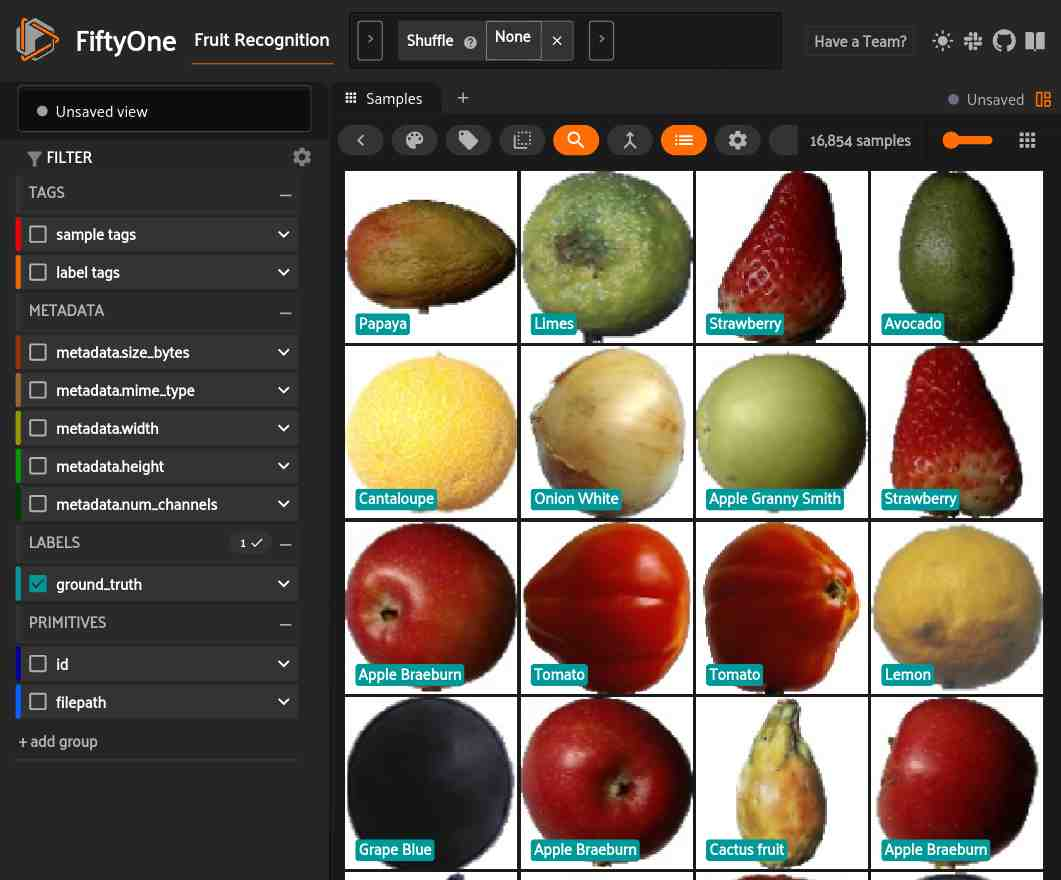

In [7]:
import fiftyone as fo

name = "Fruit Recognition"
dataset_dir = "fruit-recognition/train/train"

# Create the dataset
dataset = fo.Dataset.from_dir(
    dataset_dir=dataset_dir,
    dataset_type=fo.types.ImageClassificationDirectoryTree,
    name=name,
)

session = fo.launch_app(dataset.shuffle())

In [41]:
!kaggle datasets download -d dhruvildave/english-handwritten-characters-dataset

Dataset URL: https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset
License(s): ODbL-1.0
100%|█████████████████████████████████████▊| 13.0M/13.1M [00:01<00:00, 9.83MB/s]
100%|██████████████████████████████████████| 13.1M/13.1M [00:01<00:00, 8.33MB/s]


In [42]:
!unzip english-handwritten-characters-dataset.zip -d english-handwritten-characters-dataset

Archive:  english-handwritten-characters-dataset.zip
  inflating: english-handwritten-characters-dataset/Img/img001-001.png  
  inflating: english-handwritten-characters-dataset/Img/img001-002.png  
  inflating: english-handwritten-characters-dataset/Img/img001-003.png  
  inflating: english-handwritten-characters-dataset/Img/img001-004.png  
  inflating: english-handwritten-characters-dataset/Img/img001-005.png  
  inflating: english-handwritten-characters-dataset/Img/img001-006.png  
  inflating: english-handwritten-characters-dataset/Img/img001-007.png  
  inflating: english-handwritten-characters-dataset/Img/img001-008.png  
  inflating: english-handwritten-characters-dataset/Img/img001-009.png  
  inflating: english-handwritten-characters-dataset/Img/img001-010.png  
  inflating: english-handwritten-characters-dataset/Img/img001-011.png  
  inflating: english-handwritten-characters-dataset/Img/img001-012.png  
  inflating: english-handwritten-characters-dataset/Img/img001-013.png 

  inflating: english-handwritten-characters-dataset/Img/img013-034.png  
  inflating: english-handwritten-characters-dataset/Img/img013-035.png  
  inflating: english-handwritten-characters-dataset/Img/img013-036.png  
  inflating: english-handwritten-characters-dataset/Img/img013-037.png  
  inflating: english-handwritten-characters-dataset/Img/img013-038.png  
  inflating: english-handwritten-characters-dataset/Img/img013-039.png  
  inflating: english-handwritten-characters-dataset/Img/img013-040.png  
  inflating: english-handwritten-characters-dataset/Img/img013-041.png  
  inflating: english-handwritten-characters-dataset/Img/img013-042.png  
  inflating: english-handwritten-characters-dataset/Img/img013-043.png  
  inflating: english-handwritten-characters-dataset/Img/img013-044.png  
  inflating: english-handwritten-characters-dataset/Img/img013-045.png  
  inflating: english-handwritten-characters-dataset/Img/img013-046.png  
  inflating: english-handwritten-characters-dataset

  inflating: english-handwritten-characters-dataset/Img/img031-017.png  
  inflating: english-handwritten-characters-dataset/Img/img031-018.png  
  inflating: english-handwritten-characters-dataset/Img/img031-019.png  
  inflating: english-handwritten-characters-dataset/Img/img031-020.png  
  inflating: english-handwritten-characters-dataset/Img/img031-021.png  
  inflating: english-handwritten-characters-dataset/Img/img031-022.png  
  inflating: english-handwritten-characters-dataset/Img/img031-023.png  
  inflating: english-handwritten-characters-dataset/Img/img031-024.png  
  inflating: english-handwritten-characters-dataset/Img/img031-025.png  
  inflating: english-handwritten-characters-dataset/Img/img031-026.png  
  inflating: english-handwritten-characters-dataset/Img/img031-027.png  
  inflating: english-handwritten-characters-dataset/Img/img031-028.png  
  inflating: english-handwritten-characters-dataset/Img/img031-029.png  
  inflating: english-handwritten-characters-dataset

  inflating: english-handwritten-characters-dataset/Img/img042-039.png  
  inflating: english-handwritten-characters-dataset/Img/img042-040.png  
  inflating: english-handwritten-characters-dataset/Img/img042-041.png  
  inflating: english-handwritten-characters-dataset/Img/img042-042.png  
  inflating: english-handwritten-characters-dataset/Img/img042-043.png  
  inflating: english-handwritten-characters-dataset/Img/img042-044.png  
  inflating: english-handwritten-characters-dataset/Img/img042-045.png  
  inflating: english-handwritten-characters-dataset/Img/img042-046.png  
  inflating: english-handwritten-characters-dataset/Img/img042-047.png  
  inflating: english-handwritten-characters-dataset/Img/img042-048.png  
  inflating: english-handwritten-characters-dataset/Img/img042-049.png  
  inflating: english-handwritten-characters-dataset/Img/img042-050.png  
  inflating: english-handwritten-characters-dataset/Img/img042-051.png  
  inflating: english-handwritten-characters-dataset

  inflating: english-handwritten-characters-dataset/Img/img055-036.png  
  inflating: english-handwritten-characters-dataset/Img/img055-037.png  
  inflating: english-handwritten-characters-dataset/Img/img055-038.png  
  inflating: english-handwritten-characters-dataset/Img/img055-039.png  
  inflating: english-handwritten-characters-dataset/Img/img055-040.png  
  inflating: english-handwritten-characters-dataset/Img/img055-041.png  
  inflating: english-handwritten-characters-dataset/Img/img055-042.png  
  inflating: english-handwritten-characters-dataset/Img/img055-043.png  
  inflating: english-handwritten-characters-dataset/Img/img055-044.png  
  inflating: english-handwritten-characters-dataset/Img/img055-045.png  
  inflating: english-handwritten-characters-dataset/Img/img055-046.png  
  inflating: english-handwritten-characters-dataset/Img/img055-047.png  
  inflating: english-handwritten-characters-dataset/Img/img055-048.png  
  inflating: english-handwritten-characters-dataset

In [45]:
import pandas as pd

# Load the labels CSV file into a DataFrame
df = pd.read_csv("english-handwritten-characters-dataset/english.csv")

# Print the first few rows (head) of the DataFrame
print(df.head())

                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0


 100% |███████████████| 3410/3410 [298.3ms elapsed, 0s remaining, 11.5K samples/s]  



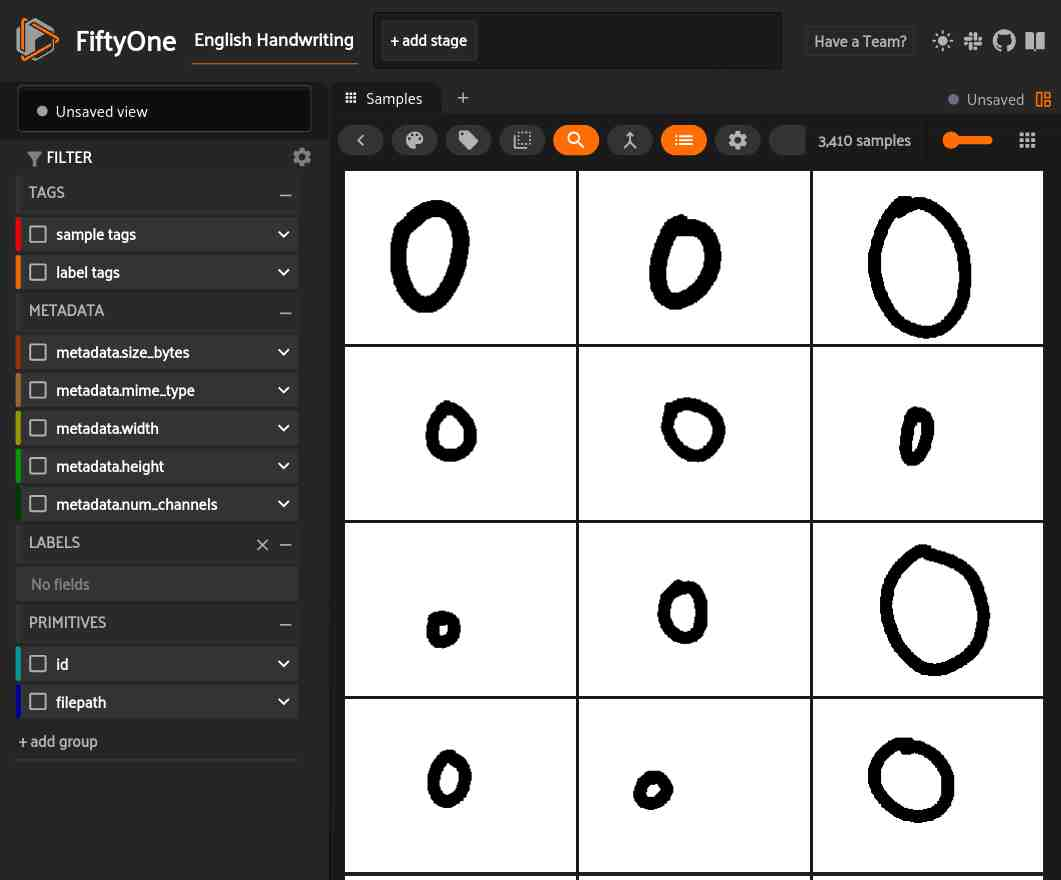

In [47]:
name = "English Handwriting"
dataset_dir = "english-handwritten-characters-dataset/Img"

# Create the dataset
dataset = fo.Dataset.from_dir(
    dataset_dir=dataset_dir,
    dataset_type=fo.types.ImageDirectory,
    name=name,
)

session = fo.launch_app(dataset)


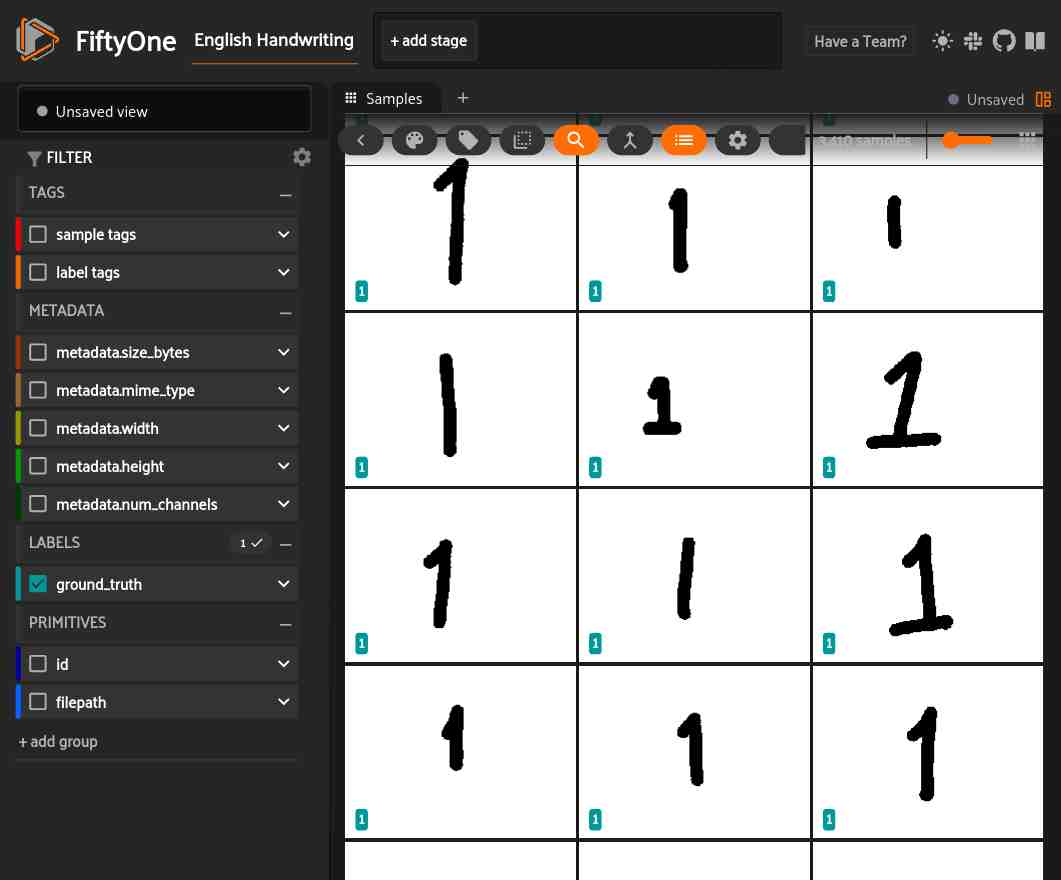

In [51]:
for sample in dataset:

    image_name = "Img/" + sample.filepath.split("/")[-1]
    row = df[df["image"] == image_name]
    if len(row) > 0:
        label = row["label"].item()
        sample["ground_truth"] = fo.Classification(label=label)
        sample.save()

session.show()